In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import plotly.graph_objects as go

C:\Users\gwd007\Documents\Exjobb\data\extracted\group1\N-B_Mid2_Comp.txt_N10, B, 0.11.csv


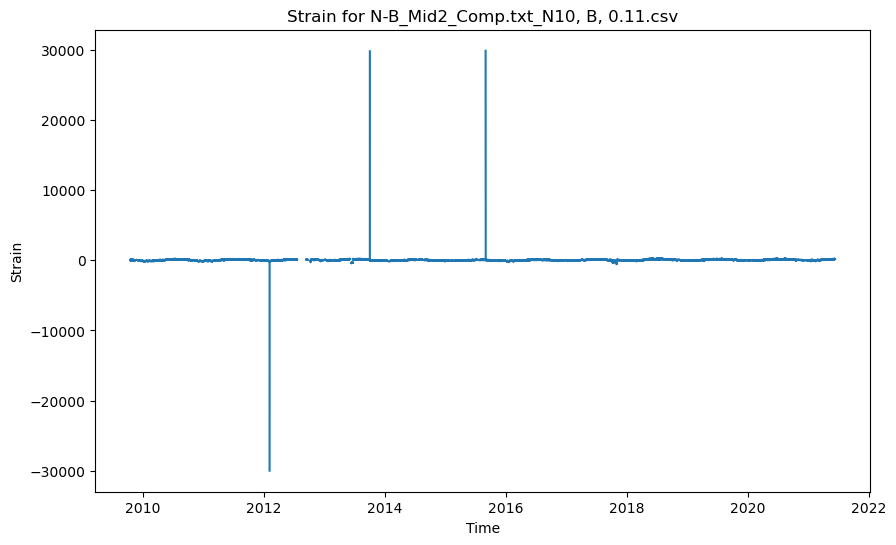

In [9]:
# Add the root project directory to the Python path
project_root = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(project_root))

from configs.path_config import EXTRACTED_DATA_DIR

base_dir = EXTRACTED_DATA_DIR
file = 'N-B_Mid2_Comp.txt_N10, B, 0.11.csv'
path = Path(base_dir) / 'group1' / file

print(path)

df = pd.read_csv(path, parse_dates=['Time'])

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

In [10]:
from src.processing import preprocessing

df = preprocessing.clean_zeros_outliers_interpolate(df)

df_original = df.copy()
df_mean = df.copy()

130 zeros to replace with NaN
Number of mild outliers (1.5 × IQR): 171
Number of extreme outliers (3 × IQR): 53
Number of outliers replaced with NaN: 171


In [11]:
#indentify the regions of missing values
from src.processing import nan_regions #nan_regions.py

threshold = 5 # Choose the threshold(s) for consecutive NaNs
consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold)

# for threshold in thresholds:

fig = go.Figure()

# Add strain data line
fig.add_trace(go.Scatter(x=df['Time'], y=df['Strain'], mode='lines', name='Strain Data'))

# Shade regions with more than x consecutive NaNs
for start, end in consecutive_nan_regions:
    fig.add_vrect(
        x0=df['Time'].loc[start], x1=df['Time'].loc[end],
        fillcolor='red', opacity=0.3, layer='below', line_width=0
    )

# Print NaN regions information
for column in nan_regions_sorted:
    print(f"Length: {column[4]}, Start Time: {column[2]}, End Time: {column[3]}")

# Figure layout
fig.update_layout(
    title=f'Regions of more than {threshold} consecutive NaNs',
    xaxis_title='Time',
    yaxis_title='Strain',
    legend=dict(x=0, y=1),
)

fig.show()


Length: 800, Start Time: 2009-06-05 00:00:00, End Time: 2009-10-16 04:00:00
Length: 329, Start Time: 2012-07-18 12:00:00, End Time: 2012-09-11 04:00:00
Length: 105, Start Time: 2013-06-03 08:00:00, End Time: 2013-06-20 16:00:00
Length: 85, Start Time: 2012-09-21 08:00:00, End Time: 2012-10-05 08:00:00
Length: 67, Start Time: 2014-07-11 12:00:00, End Time: 2014-07-22 12:00:00
Length: 41, Start Time: 2014-11-06 12:00:00, End Time: 2014-11-13 04:00:00
Length: 23, Start Time: 2011-11-25 16:00:00, End Time: 2011-11-29 08:00:00
Length: 21, Start Time: 2011-04-04 00:00:00, End Time: 2011-04-07 08:00:00
Length: 20, Start Time: 2013-11-22 00:00:00, End Time: 2013-11-25 04:00:00
Length: 20, Start Time: 2017-09-03 08:00:00, End Time: 2017-09-06 12:00:00
Length: 19, Start Time: 2011-10-28 04:00:00, End Time: 2011-10-31 04:00:00
Length: 18, Start Time: 2014-03-07 08:00:00, End Time: 2014-03-10 04:00:00
Length: 17, Start Time: 2011-07-08 12:00:00, End Time: 2011-07-11 04:00:00
Length: 17, Start Time

In [12]:
from src.processing import shift_region 

n_points = 15
std_multiplier = 4.6
min_region_size = 5
df_diff = shift_region.shift_scale_diff(df, std_multiplier, n_points, n_points, min_region_size)

956   -3.0
957    1.0
958    9.0
959   -1.0
960   -5.0
961   -6.0
962   -9.0
963   -7.0
Name: Strain, dtype: float64
         Start time            End time  Previous Mean  Previous Std  Lower Bound  Upper Bound  Current Mean  Delta Shift  Total Shift
2009-11-11 08:00:00 2009-11-12 12:00:00      15.133333     12.287431   -41.388848    71.655514        -2.625            0            0
965    -2.0
966    -6.0
967   -14.0
Name: Strain, dtype: float64
         Start time            End time  Previous Mean  Previous Std  Lower Bound  Upper Bound  Current Mean  Delta Shift  Total Shift
2009-11-12 20:00:00 2009-11-13 04:00:00         -2.625      5.705574   -28.870639    23.620639     -7.333333            0            0
975     17.0
976     21.0
977     40.0
978     41.0
979     39.0
        ... 
1042    51.0
1043    44.0
1044    44.0
1045    39.0
1046    38.0
Name: Strain, Length: 72, dtype: float64
         Start time            End time  Previous Mean  Previous Std  Lower Bound  Upper Bound

In [13]:
from src.processing import interpolate_nan
from src.processing import nan_regions

interpolate_threshold = 5

consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold=1)

df_filled = interpolate_nan.interpolate(df, nan_regions_sorted, interpolate_threshold)

Region to fill: 
   Length: 5 steps
   Start Time: 2011-01-11 12:00:00
   End Time: 2011-01-12 04:00:00
3512
Both indices (3512, 3518) are valid -> interpolate 5 steps
target: 3513
Interpolated value at index 3513: -147.7206349206349
target: 3514
Interpolated value at index 3514: -144.8984126984127
target: 3515
Interpolated value at index 3515: -142.07619047619048
target: 3516
Interpolated value at index 3516: -139.25396825396825
target: 3517
Interpolated value at index 3517: -136.43174603174606
Start value: -150.54285714285712
End value: -133.60952380952384 

Region to fill: 
   Length: 5 steps
   Start Time: 2014-03-23 20:00:00
   End Time: 2014-03-24 12:00:00
10516
Both indices (10516, 10522) are valid -> interpolate 5 steps
target: 10517
Interpolated value at index 10517: -59.89285714285723
target: 10518
Interpolated value at index 10518: -56.39285714285723
target: 10519
Interpolated value at index 10519: -52.89285714285723
target: 10520
Interpolated value at index 10520: -49.39285

In [14]:
fig = go.Figure()

# Add traces for the different data series
fig.add_trace(go.Scatter(x=df_filled['Time'], y=df_filled['Strain'], mode='lines', name='Original', line=dict(color='blue')))


# Add labels
fig.update_layout(
    title=f'Strain for {file}',
    xaxis_title='Time',
    yaxis_title='Strain',
    template='plotly_white'
)

# Show the plot
fig.show()